Garcia, Gilberto

ASTR5900

HW3 - Numerical Integration

14 February 2024


____

# Question 1

Write your own code(s) to carry out a numerical integration using both the Euler Method and a Runge-Kutta Method (either 2nd order or 4th order).


## a

Use your code to solve the equation

$$ \frac{dy}{dx} = y^2 + 1 $$

and compare your answer with the exact solution $y = \tan(x)$. Also compare (and show
and comment on) your results for both the Euler and Runge-Kutta methods, using the same number of steps for each.

## b

At what value of x does your numerical solution start to break down, and how does that relate to the derivative of $y(x)$? Use a plot and/or table of numbers to show this breakdown.

## c
Show that a decrease in step size increases your accuracy. Do you notice a difference in how much the accuracy improves for the Euler method, versus the Runge-Kutta?

## d

Pretend like you don't know the exact solution to the equation above. Do a convergence study, calculating the fractional difference between your highest-resolution (smallest step- size) case and a few other lower-resolution cases (make a range of step sizes over at least a factor of 10-100). Plot the fractional difference as a function of step size on a log-log scale. Show the Euler and Runge-Kutta methods on the same plot. The slope in this log- log plot is often referred to as the order of convergence. Comment on what you see.

## e

Now consider the exact/known solution. Does your smallest fractional difference, between your two highest-resolution cases, well-represent the actual difference between your best solution and the exact solution (i.e., is this a good measure of the uncertainty in your result)?

___

In [25]:
import matplotlib.pyplot as plt
import numpy as np

## 1a

We first code our differential equation:

$$
\frac{dy}{dx} = y^2 + 1 = f(x,y)
$$

In [4]:
def dydx(x,y):
    return y**2 + 1

In [45]:
#we now code RK2 (Heun's Method):
def RK2(function,y0,x0,xf,num_of_steps):
    '''
    inputs:
        - function:
        - y0:
        - x0:
        - xf:
        - num_of_steps:
    outputs:
        - results
    '''
    #we calculate the step size from the given boundary points and
    #num. of steps
    step_size = (xf - x0)/num_of_steps
    #we initialize our xi and yi to be the initial x and y given
    yi = y0
    xi = x0
    #initialize our stepper
    stepper = x0
    #initialize lists to write x and y values to:
    x_lst,y_lst = [],[]
    while stepper <= xf:
        x_lst += [xi]
        y_lst += [yi]
        #print(xi,yi)
        k1 = function(xi,yi)
        k2 = function(xi + step_size,yi + k1*step_size)
        y_next = yi + (1/2)*(k1 + k2)*step_size
        x_next = xi + step_size
        yi = y_next
        xi = x_next
        stepper += step_size
        
    return x_lst,y_lst
        
        

In [61]:
np.tan(-np.pi/3)

-1.7320508075688767

In [62]:
np.pi/3

1.0471975511965976

In [79]:
xinitial,xfinal = -np.pi/2.09,np.pi/2.09
yinitial = np.tan(xinitial)
num_of_steps = 50
x_lst,y_lst = RK2(dydx,yinitial,xinitial,xfinal,num_of_steps)

tan_x_values = np.linspace(xinitial,xfinal,num_of_steps)
tan_y_values = np.tan(tan_x_values)

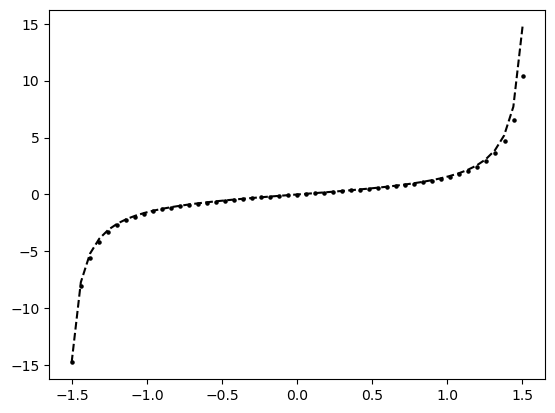

In [80]:
plt.scatter(x_lst,y_lst,s=5,color='black')
plt.plot(tan_x_values,tan_y_values,linestyle='--',color='black')
plt.show()